# *Elliptic++ Bitcoin Dataset (Exploratory Data Analysis) EDA*

---
---

# **1. Preparación**
---

In [189]:
#@title ### Instalación de librerías

!pip install matplotlib
!pip install scikit-learn
!pip install networkx
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/m

# **2. Obtención de los datos**
---

## 2.1 Obtener CSVs

### Opción A: Descargar dataset de Internet

In [ ]:
!mkdir -p Datasets
!gdown https://drive.google.com/drive/folders/1MRPXz79Lu_JGLlJ21MDfML44dKN9R08l?usp=sharing --folder -O Datasets/

Retrieving folder contents
Processing file 1x5JdNWX8fVM3FO8I0wOLDAeh2qaB53uV AddrAddr_edgelist.csv
Processing file 16eWZTe-dsjEqgsOqFtg78m4fYhcxKlmZ AddrTx_edgelist.csv
Processing file 1SYpun0DMDt-h3sbI60G55jNsfwnFTHXg TxAddr_edgelist.csv
Processing file 1DiBxn8TXdbJqoSw58pYUeaqO3oOKhuQO txs_classes.csv
Processing file 1Q2yG_CIDvfdGP-fKVPSw979EYgQukjz5 txs_edgelist.csv
Processing file 19q09IFhfkOOBOXvn_dKhWjILJtjCcsjc txs_features.csv
Processing file 1ZaACVE4wSIx7r8Z9ze7ExQnJ0wzGrVkp wallets_classes.csv
Processing file 1YLCIn8rPAh4FjKiZynblU2rLx-Fxr2WA wallets_features_classes_combined.csv
Processing file 1mhrrobYdnaxYBIVK06EpKB2EwV-ERlce wallets_features.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1x5JdNWX8fVM3FO8I0wOLDAeh2qaB53uV
From (redirected): https://drive.google.com/uc?id=1x5JdNWX8fVM3FO8I0wOLDAeh2qaB53uV&confirm=t&uuid=873a1323-9ee1-4685-9602-726f3c9

### Opción B: Obtener dataset de la Unidad de Drive

In [ ]:
from google.colab import drive
from os import path as osp

drive.mount('/content/gdrive',force_remount=True)
%cd '/content/gdrive/My Drive/Colab Notebooks/TFG Infor'

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/TFG Infor



## 2.2. Creación de dataframes de Pandas a partir de los CSVs

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize

class_mapping = {
    1: 1,
    2: 0,
    3: 2
}

# Wallets
# Load CSVs
df_wallet_features = pd.read_csv("./Datasets/Elliptic++ Dataset/wallets_features.csv")
df_wallet_classes = pd.read_csv("./Datasets/Elliptic++ Dataset/wallets_classes.csv")
wallet_feature_columns = df_wallet_features.columns[2:]
# Map class labels
df_wallet_classes.loc[:,'class'] = df_wallet_classes['class'].map(class_mapping)
# Join class and features
df_wallet = pd.merge(df_wallet_classes, df_wallet_features, on='address', how='inner')

# Transacciones
# Load CSVs
df_tnx_features = pd.read_csv("./Datasets/Elliptic++ Dataset/txs_features.csv")
df_tnx_classes = pd.read_csv("./Datasets/Elliptic++ Dataset/txs_classes.csv")
# Drop NaNs
df_tnx_nan = df_tnx_features[df_tnx_features.isna().any(axis=1)]['txId'].tolist()
df_tnx_features = df_tnx_features.dropna()
df_tnx_classes = df_tnx_classes[~df_tnx_classes['txId'].isin(df_tnx_nan)]
tnx_feature_columns = df_tnx_features.columns[2:]
# Map class labels
df_tnx_classes.loc[:,'class'] = df_tnx_classes['class'].map(class_mapping)
# Join class and features
df_tnx = pd.merge(df_tnx_classes, df_tnx_features, on='txId', how='inner')

# Edgelist
df_AddrTx_edgelist = pd.read_csv("./Datasets/Elliptic++ Dataset/AddrTx_edgelist.csv")
df_AddrTx_edgelist = df_AddrTx_edgelist[~df_AddrTx_edgelist['txId'].isin(df_tnx_nan)]
df_TxAddr_edgelist = pd.read_csv("./Datasets/Elliptic++ Dataset/TxAddr_edgelist.csv")
df_TxAddr_edgelist = df_TxAddr_edgelist[~df_TxAddr_edgelist['txId'].isin(df_tnx_nan)]

In [45]:
df_wallet

,address,class,Time step,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,0,25,0.0,1.0,439586.0,439586.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,24.0,1.0,1.0,1.0,1.0
1,1111DAYXhoxZx2tsRnzimfozo783x1yC2,2,25,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
2,1111DAYXhoxZx2tsRnzimfozo783x1yC2,2,29,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
3,1111DAYXhoxZx2tsRnzimfozo783x1yC2,2,39,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
4,1111DAYXhoxZx2tsRnzimfozo783x1yC2,2,39,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268255,3R2Uw5MRdSSigp8AjfT7K5es6Hupm4qLSq,2,31,1.0,1.0,451684.0,451685.0,1.0,2.0,451685.0,...,0.0,0.0,0.000000,0.0,0.0,3.0,1.0,1.0,1.0,1.0
1268256,3R2VBFbqHGC4bQ7b4ixN4jZTdv7RMbEYtf,2,44,0.0,1.0,477895.0,477895.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268257,3R2WFmRwbDeo3rMVVu5J3jjMxAuQYYWAid,2,9,0.0,1.0,407342.0,407342.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268258,3R2WTZGYLmbJQyoDSBftJsPRvF1mSEtkh6,2,3,0.0,1.0,395235.0,395235.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [46]:
df_tnx

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,in_BTC_min,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total
0,3321,2,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.534072,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972
1,11108,2,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,5.611878,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778
2,51816,2,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.456608,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508
3,68869,0,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,...,0.308900,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800
4,89273,0,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,...,852.164680,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202799,194747812,2,49,0.558398,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,...,115.952889,115.952889,115.952889,115.952889,115.952889,1.653300e+00,114.299544,57.976422,57.976422,115.952844
202800,194747925,2,49,0.547658,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,...,114.250098,114.250098,114.250098,114.250098,114.250098,2.035300e-02,114.229700,57.125027,57.125027,114.250053
202801,194748063,2,49,0.543600,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,...,113.606771,113.606771,113.606771,113.606771,113.606771,9.257490e-01,112.680977,56.803363,56.803363,113.606726
202802,194748070,2,49,0.537760,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,...,112.680977,112.680977,112.680977,112.680977,112.680977,3.026970e-01,112.378235,56.340466,56.340466,112.680932


# **3. *Exploratory Data Analysis (EDA)***
---

## 3.1. Visualización de los datos usando t-SNE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm

sns.set(style="whitegrid")
rs = 33

t-SNE es un algoritmo de reducción de dimensiones ideal para la visualización de los datos, pero no tanto para su análisis.

In [ ]:
!mkdir -p ./Plots/EDA/

### Visualización de las transacciones en 3 dimensiones

In [ ]:
for t in tqdm(range(1,50)):
    tsne = TSNE(n_components=3, random_state=rs, n_jobs=-1)

    masked_df_tnx = df_tnx[df_tnx['Time step'] == t]
    reduced_features = tsne.fit_transform(masked_df_tnx[tnx_feature_columns])
    labels = masked_df_tnx['class']

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(reduced_features[np.where(labels == 0), 0], reduced_features[np.where(labels == 0), 1], reduced_features[np.where(labels == 0), 2], marker='o', color='g', linewidth=1, label='Lícita')
    ax.scatter(reduced_features[np.where(labels == 1), 0], reduced_features[np.where(labels == 1), 1], reduced_features[np.where(labels == 1), 2], marker='o', color='r', linewidth=1, label='Ilícita')
    ax.legend()
    plt.savefig(f'./Plots/EDA/tsne_epp{t}_tnx_01.eps',format='eps',bbox_inches='tight')
    plt.close()

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(reduced_features[np.where(labels == 0), 0], reduced_features[np.where(labels == 0), 1], reduced_features[np.where(labels == 0), 2], marker='o', color='g', linewidth=1, label='Lícita')
    ax.scatter(reduced_features[np.where(labels == 1), 0], reduced_features[np.where(labels == 1), 1], reduced_features[np.where(labels == 1), 2], marker='o', color='r', linewidth=1, label='Ilícita')
    ax.scatter(reduced_features[np.where(labels == 2), 0], reduced_features[np.where(labels == 2), 1], reduced_features[np.where(labels == 2), 2], marker='o', color='orange', linewidth=1, label='Desconocida')
    ax.legend()
    plt.savefig(f'./Plots/EDA/tsne_epp{t}_tnx_012.eps',format='eps',bbox_inches='tight')
    plt.close()


  0%|          | 0/49 [00:00<?, ?it/s]

### Visualización de los *wallets* en 3 dimensiones para el *timestep* 7

In [ ]:
t= 7
tsne = TSNE(n_components=3, random_state=rs, n_jobs=-1)

masked_df_wallet = df_wallet[df_wallet['Time step'] == t]
reduced_features = tsne.fit_transform(masked_df_wallet[wallet_feature_columns])
labels = masked_df_wallet['class']

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(reduced_features[np.where(labels == 0), 0], reduced_features[np.where(labels == 0), 1], reduced_features[np.where(labels == 0), 2], marker='o', color='g', linewidth=1, label='Lícito')
ax.scatter(reduced_features[np.where(labels == 1), 0], reduced_features[np.where(labels == 1), 1], reduced_features[np.where(labels == 1), 2], marker='o', color='r', linewidth=1, label='Ilícito')
ax.legend()
plt.savefig(f'./Plots/EDA/tsne_epp{t}_wallet_01.eps',format='eps',bbox_inches='tight')
plt.close()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(reduced_features[np.where(labels == 0), 0], reduced_features[np.where(labels == 0), 1], reduced_features[np.where(labels == 0), 2], marker='o', color='g', linewidth=1, label='Lícito')
ax.scatter(reduced_features[np.where(labels == 1), 0], reduced_features[np.where(labels == 1), 1], reduced_features[np.where(labels == 1), 2], marker='o', color='r', linewidth=1, label='Ilícito')
ax.scatter(reduced_features[np.where(labels == 2), 0], reduced_features[np.where(labels == 2), 1], reduced_features[np.where(labels == 2), 2], marker='o', color='b', linewidth=1, label='Desconocido')
ax.legend()
plt.savefig(f'./Plots/EDA/tsne_epp{t}_wallet_012.eps',format='eps',bbox_inches='tight')
plt.close()


## 3.2. Análisis de desbalanceo por ***timesteps***

In [ ]:
sns.set(style="darkgrid")

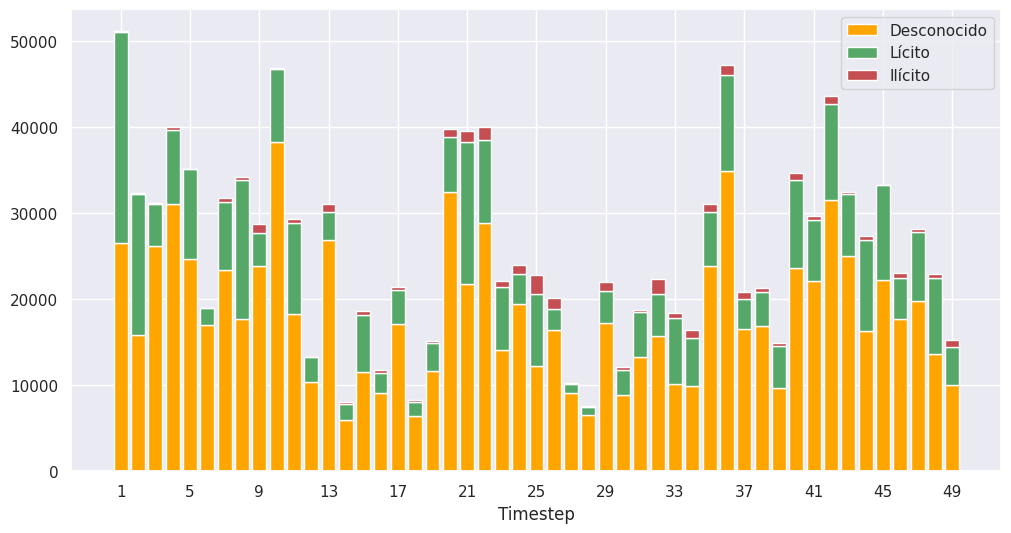

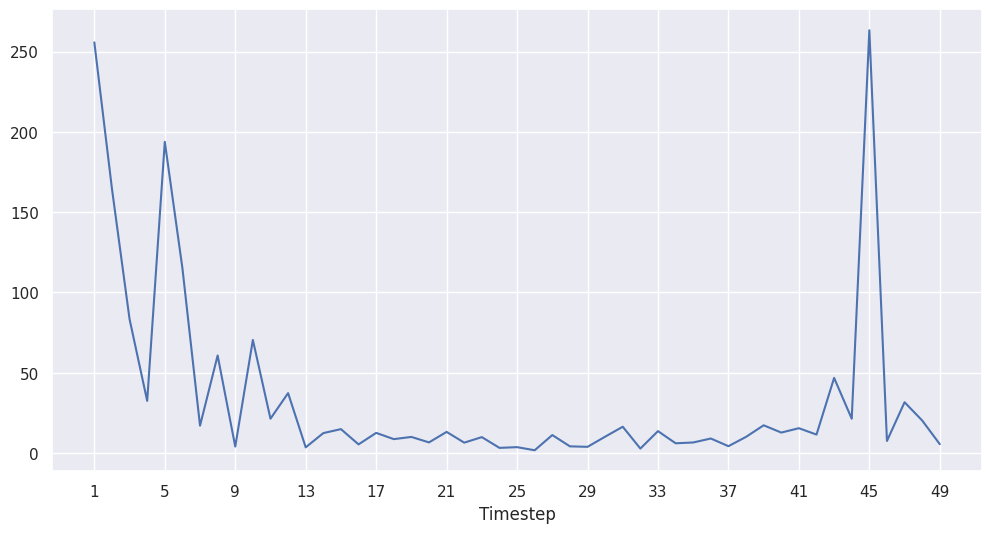

In [ ]:

c_wallet_licit = df_wallet[df_wallet['class'] == 0].groupby('Time step').size()
c_wallet_ilicit = df_wallet[df_wallet['class'] == 1].groupby('Time step').size()
c_wallet_unknown = df_wallet[df_wallet['class'] == 2].groupby('Time step').size()
wallet_imbalance = c_wallet_licit / c_wallet_ilicit

_, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c_wallet_unknown.index, c_wallet_unknown.values, color='orange', label='Desconocido')
ax.bar(c_wallet_licit.index, c_wallet_licit.values, color='g', bottom=c_wallet_unknown.values, label='Lícito')
ax.bar(c_wallet_ilicit.index, c_wallet_ilicit.values, color='r', bottom=c_wallet_unknown.values+c_wallet_licit.values, label='Ilícito')
ax.legend()
ax.set_xticks(range(1,50,4))
ax.set_xlabel('Timestep')
plt.savefig(f'./Plots/EDA/imbalance_bars_epp_wallet.eps',format='eps',bbox_inches='tight')
plt.show()
plt.close()

_, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(wallet_imbalance.index, wallet_imbalance.values)
ax.set_xticks(range(1,50,4))
ax.set_xlabel('Timestep')
plt.savefig(f'./Plots/EDA/imbalance_line_epp_wallet.eps',format='eps',bbox_inches='tight')
plt.show()
plt.close()

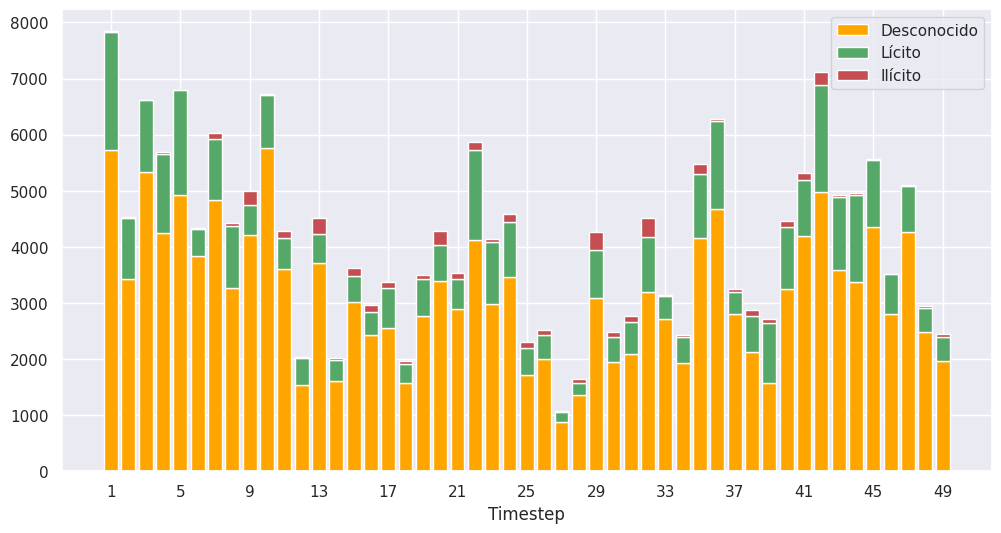

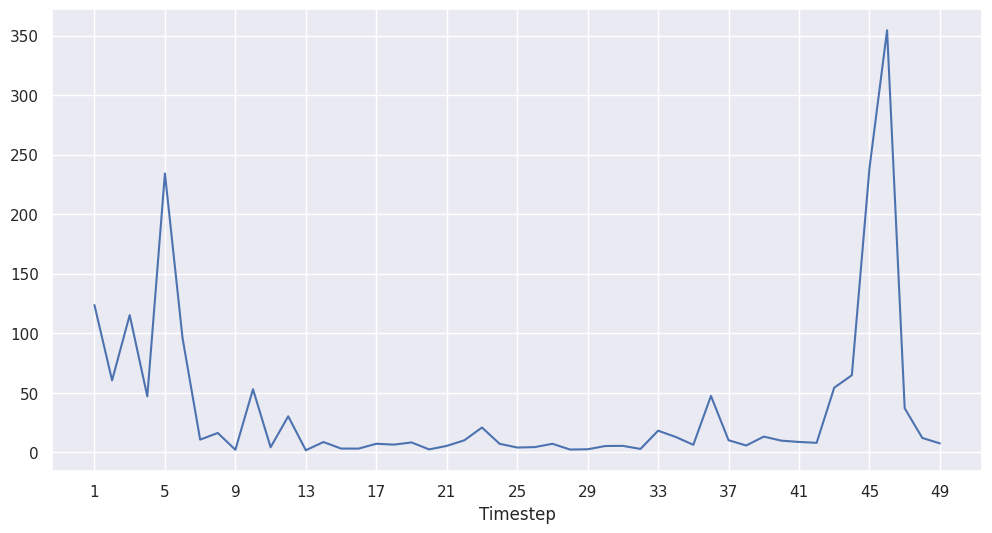

In [ ]:

c_tnx_licit = df_tnx[df_tnx['class'] == 0].groupby('Time step').size()
c_tnx_ilicit = df_tnx[df_tnx['class'] == 1].groupby('Time step').size()
c_tnx_unknown = df_tnx[df_tnx['class'] == 2].groupby('Time step').size()
tnx_imbalance = c_tnx_licit / c_tnx_ilicit

_, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c_tnx_unknown.index, c_tnx_unknown.values, color = 'orange', label='Desconocido')
ax.bar(c_tnx_licit.index, c_tnx_licit.values, color='g', bottom=c_tnx_unknown.values, label='Lícito')
ax.bar(c_tnx_ilicit.index, c_tnx_ilicit.values, color='r', bottom=c_tnx_unknown.values+c_tnx_licit.values, label='Ilícito')
ax.legend()
ax.set_xticks(range(1,50,4))
ax.set_xlabel('Timestep')
plt.savefig(f'./Plots/EDA/imbalance_bars_epp_tnx.eps',format='eps',bbox_inches='tight')
plt.show()
plt.close()

_, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(tnx_imbalance.index, tnx_imbalance.values)
ax.set_xticks(range(1,50,4))
ax.set_xlabel('Timestep')
plt.savefig(f'./Plots/EDA/imbalance_line_epp_tnx.eps',format='eps',bbox_inches='tight')
plt.show()
plt.close()


## 3.3. *Feature Engineering*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif


sns.set(style="darkgrid")
rs = 33

### 3.4.1. PCA y Varianza explicativa acumulada

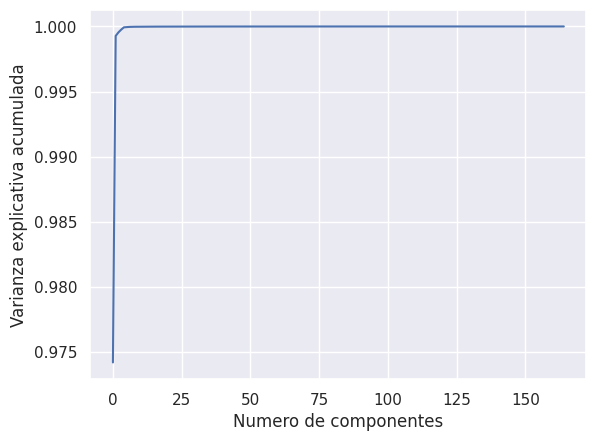

In [ ]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=165)
pca.fit(df_tnx[tnx_feature_columns])
expl = pca.explained_variance_ratio_

plt.plot(np.cumsum(expl))
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza explicativa acumulada')
plt.show()


### 3.4.2. Información mutua por *feature*

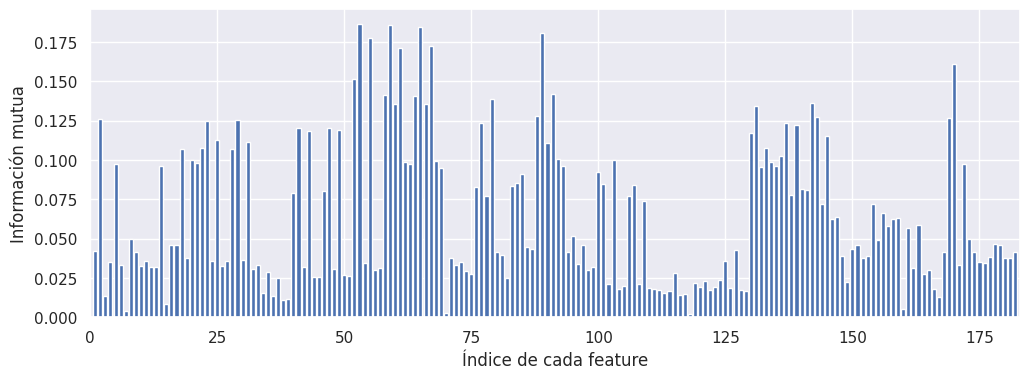

In [ ]:

df_known_tnx = df_tnx[df_tnx['class'].isin([0,1])]
feat = df_known_tnx[tnx_feature_columns]
mis = mutual_info_classif(feat, df_known_tnx['class'], random_state=rs)

plt.figure(figsize = (12,4))
plt.bar([i+1 for i in range(feat.shape[1])], mis)
ax = plt.gca()
ax.set_xlim([0, 183])
plt.xlabel("Índice de cada feature")
plt.ylabel("Información mutua")
plt.savefig(f'./Plots/EDA/mutual_info_tnx.eps',format='eps',bbox_inches='tight')
plt.show()
plt.close()


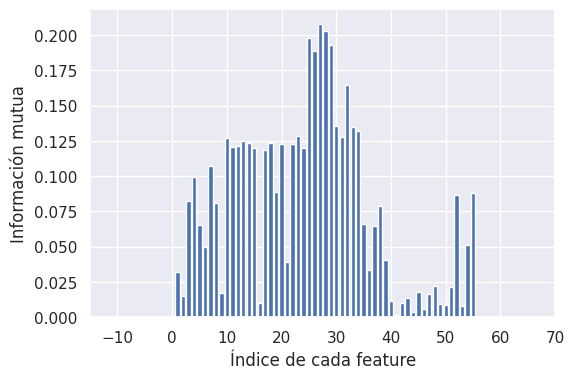

In [ ]:

df_known_wallet = df_wallet[df_wallet['class'].isin([0,1])]
feat = df_known_wallet[wallet_feature_columns]
mis = mutual_info_classif(feat, df_known_wallet['class'], random_state=rs)

plt.figure(figsize = (6,4))
plt.bar([i+1 for i in range(feat.shape[1])], mis)
ax = plt.gca()
ax.set_xlim([-15, 70])
plt.xlabel("Índice de cada feature")
plt.ylabel("Información mutua")
plt.savefig(f'./Plots/EDA/mutual_info_wallet.eps',format='eps',bbox_inches='tight')
plt.show()
plt.close()


## 3.4. Visualización del grafo heterogéneo

In [180]:
from tqdm.notebook import tqdm
import seaborn as sns


sns.set(style="white")
sns.set_context("paper")
rs = 103

In [191]:
#@title Construcción de un subgrafo
timestep = 42
masked_tnx = df_tnx[df_tnx['Time step']==timestep].iloc[:,:2]
masked_wallet = df_wallet[df_wallet['Time step']==timestep].iloc[:,:2]
masked_AddrTx = df_AddrTx_edgelist[df_AddrTx_edgelist['input_address'].isin(masked_wallet['address']) & df_AddrTx_edgelist['txId'].isin(masked_tnx['txId'])]
masked_TxAddr = df_TxAddr_edgelist[df_TxAddr_edgelist['output_address'].isin(masked_wallet['address']) & df_TxAddr_edgelist['txId'].isin(masked_tnx['txId'])]

# Obtengo un wallet ilícito aleatorio
subgraph_wallet = masked_wallet[masked_wallet['class']==1].sample(1, random_state=rs).reset_index(drop=True)
start_wallet = subgraph_wallet.iloc[0]

# Voy un nivel para atrás
subgraph_TxAddr = masked_TxAddr[masked_TxAddr['output_address']==start_wallet['address']].reset_index(drop=True)
subgraph_tnx = masked_tnx[masked_tnx['txId'].isin(subgraph_TxAddr['txId'])].reset_index(drop=True)
subgraph_AddrTx = masked_AddrTx[masked_AddrTx['txId'].isin(subgraph_tnx)].reset_index(drop=True)
prev_wallets = masked_wallet[masked_wallet['address'].isin(subgraph_AddrTx['input_address'])]
subgraph_wallet = pd.concat([subgraph_wallet, prev_wallets]).drop_duplicates(ignore_index=True)

def forward_subgraph(address):
    global masked_tnx, masked_wallet, masked_AddrTx, masked_TxAddr
    global subgraph_tnx, subgraph_wallet, subgraph_AddrTx, subgraph_TxAddr

    next_AddrTx = masked_AddrTx[masked_AddrTx['input_address'] == address].drop_duplicates(ignore_index=True)
    next_tnx = masked_tnx[masked_tnx['txId'].isin(next_AddrTx['txId'])].drop_duplicates(ignore_index=True)
    next_TxAddr = masked_TxAddr[masked_TxAddr['txId'].isin(next_tnx['txId'])].drop_duplicates(ignore_index=True)
    next_wallets = masked_wallet[masked_wallet['address'].isin(next_TxAddr['output_address'])].drop_duplicates(ignore_index=True)

    new_wallets = next_wallets[~next_wallets['address'].isin(subgraph_wallet['address'])]

    #Actualizar subgrafos
    subgraph_AddrTx = pd.concat([subgraph_AddrTx, next_AddrTx]).drop_duplicates(ignore_index=True)
    subgraph_tnx = pd.concat([subgraph_tnx, next_tnx]).drop_duplicates(ignore_index=True)
    subgraph_TxAddr = pd.concat([subgraph_TxAddr, next_TxAddr]).drop_duplicates(ignore_index=True)
    subgraph_wallet = pd.concat([subgraph_wallet, next_wallets]).drop_duplicates(ignore_index=True)

    return list(new_wallets['address'])

depth = 3
wallets_stack = [start_wallet['address']]
for i in tqdm(range(depth)):
    new_wallets = []
    while wallets_stack:
        next_wallet = wallets_stack.pop()
        new_wallets += forward_subgraph(next_wallet)
    wallets_stack += new_wallets
    if not new_wallets:
        print(f'Finalizado en la iteración {i}')
        break


  0%|          | 0/3 [00:00<?, ?it/s]

In [213]:
start_wallet

address    1NSn81TebU8xJm9YqCMgNqe1GA7c8ZZKYu
class                                       1
Name: 0, dtype: object

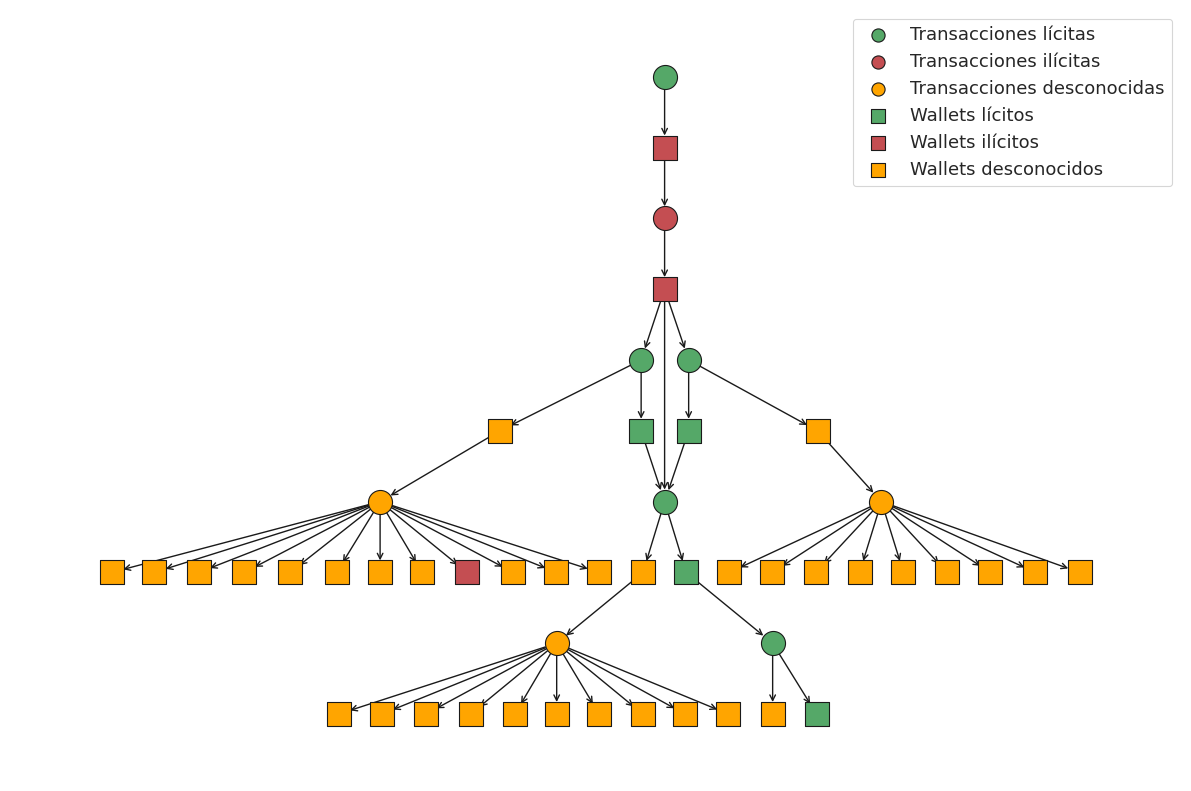

In [215]:
#@title Visualización del subgrafo

import networkx as nx
import matplotlib.pyplot as plt


subgraph_AddrTx = subgraph_AddrTx.rename(columns={'input_address':'source', 'txId':'target'})
subgraph_TxAddr = subgraph_TxAddr.rename(columns={'output_address':'target', 'txId':'source'})
subgraph_edgelist = pd.concat([subgraph_AddrTx,subgraph_TxAddr]).reset_index(drop=True)

G = nx.from_pandas_edgelist(subgraph_edgelist, source = 'source', target = 'target', create_using = nx.DiGraph())
G.add_nodes_from((d[0], {'class':d[1], 'type':'tnx'}) for _, d in subgraph_tnx.iterrows())
G.add_nodes_from((d[0], {'class':d[1], 'type':'wallet'}) for _, d in subgraph_wallet.iterrows())

#pos = nx.spring_layout(G, k=0.5)
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

_, ax = plt.subplots(1,1,figsize=(12,8))

nx.draw_networkx_edges(G, pos=pos, ax=ax, arrowstyle='->')

nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=list(subgraph_tnx[subgraph_tnx['class']==0]['txId']), node_color='g', node_shape='o', label='Transacciones lícitas').set_edgecolor('k')
nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=list(subgraph_tnx[subgraph_tnx['class']==1]['txId']), node_color='r', node_shape='o', label='Transacciones ilícitas').set_edgecolor('k')
nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=list(subgraph_tnx[subgraph_tnx['class']==2]['txId']), node_color='orange', node_shape='o', label='Transacciones desconocidas').set_edgecolor('k')

nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=list(subgraph_wallet[subgraph_wallet['class']==0]['address']), node_color='g', node_shape='s', label='Wallets lícitos').set_edgecolor('k')
nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=list(subgraph_wallet[subgraph_wallet['class']==1]['address']), node_color='r', node_shape='s', label='Wallets ilícitos').set_edgecolor('k')
nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=list(subgraph_wallet[subgraph_wallet['class']==2]['address']), node_color='orange', node_shape='s', label='Wallets desconocidos').set_edgecolor('k')

sns.despine(top=True,bottom=True,left=True,right=True)
lgnd = plt.legend(scatterpoints=1, fontsize=13)
for i in range(6):
    lgnd.legend_handles[i]._sizes = [90]
plt.tight_layout()
plt.savefig(f'./Plots/EDA/subgraph_visz.eps',format='eps')
plt.show()


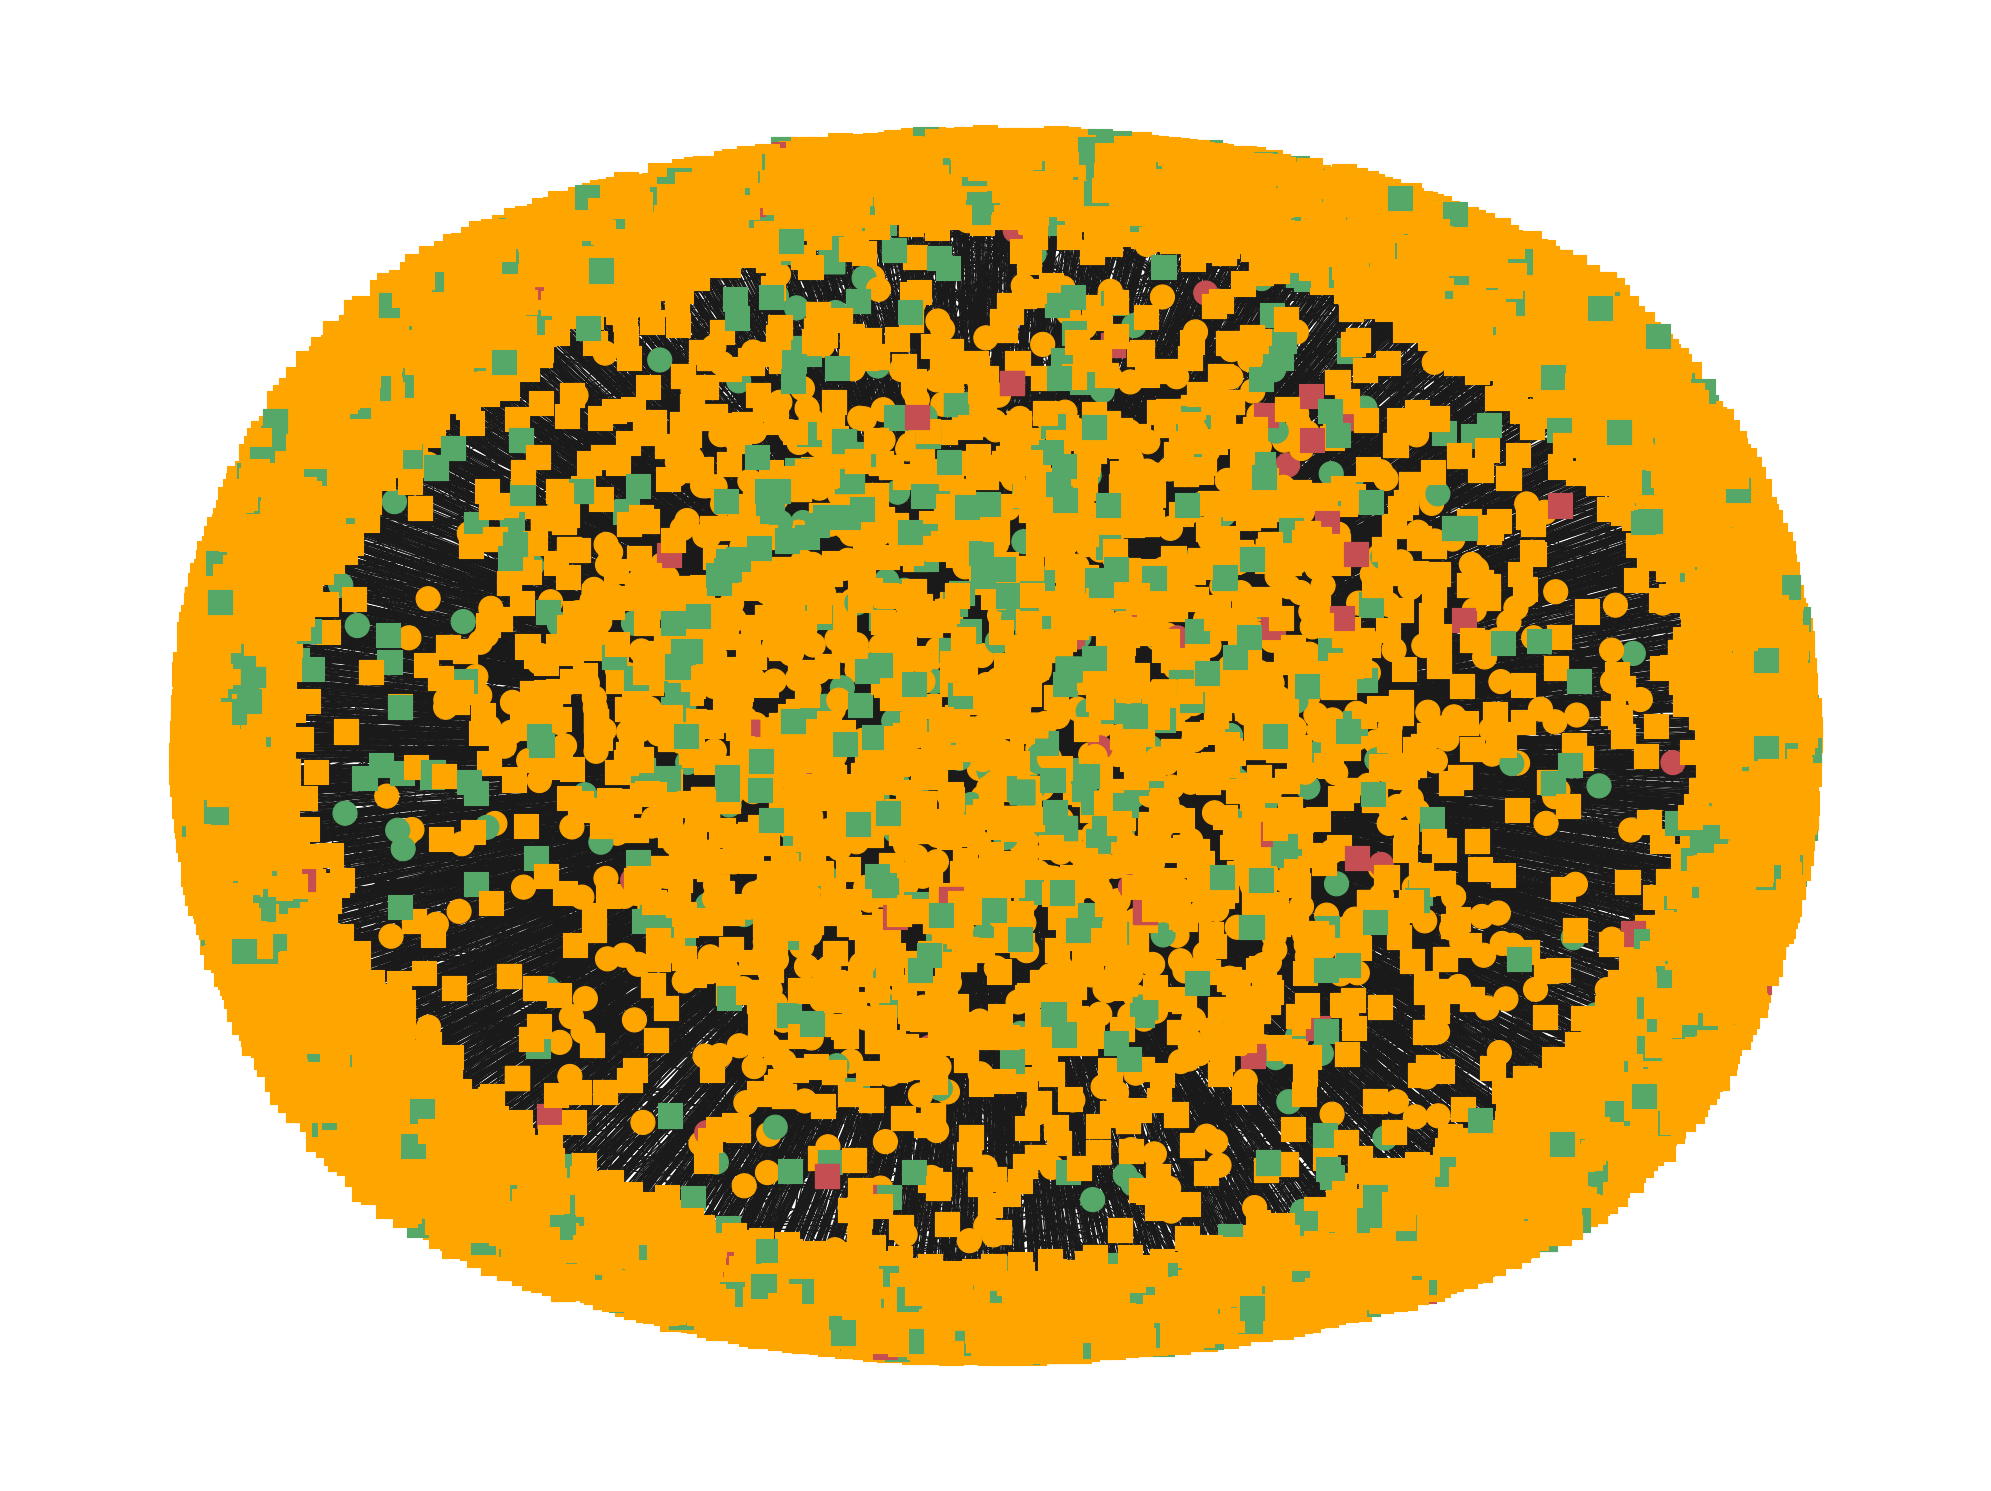

In [ ]:
pos = nx.spring_layout(G, k=0.1)

_, ax = plt.subplots(1,1,figsize=(20,15))

nx.draw_networkx_edges(G, pos=pos, ax=ax, arrowstyle='->')

color_map = {0:'g', 1:'r', 2:'orange'}
nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=list(masked_tnx['txId']), node_color=list(masked_tnx['class'].map(color_map)), node_shape='o')
nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=list(masked_wallet['address']), node_color=list(masked_wallet['class'].map(color_map)), node_shape='s')

sns.despine(top=True,bottom=True,left=True,right=True)
plt.tight_layout()
plt.show()